In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
def find_core_len(df: pd.DataFrame):
    """Takes a df or pandsas groupby and find if the core length are equal"""

    if df[df["parameter"] == "core_min"].value.iloc[0]:
        min_len = float(df[df["parameter"] == "core_min"].value.iloc[0])
        max_len = float(df[df["parameter"] == "core_max"].value.iloc[0])
        return "fixed" if min_len - max_len == 0 else "variable"
    else:
        return "meme"


In [32]:
config_file = "../data/process/benchmark_results/benchmark_config.csv"

config_dat = pd.read_csv(config_file, index_col=0)
# fill with nonsense for meme
config_dat = pd.concat([config_dat, pd.DataFrame({"config_id": ["meme_results","meme_results"], "parameter": ['core_min', 'core_max'],"value" : [None, None]})])
dat = pd.read_csv("../data/process/benchmark_results/benchmark_results.csv")

is_fixed_core = (config_dat.groupby("config_id").apply(
    find_core_len
))
is_fixed_core.name = "core_len"
config_dat = config_dat.join(is_fixed_core, on='config_id')

dat_algtype = (config_dat
    .filter(['config_id', 'core_len'])
    .merge(dat, left_on='config_id', right_on='algorithm', how="left")
)

,config_id,core_len,imodulon,algorithm,pssm_pssm
0,output_1655479480.6906908,variable,MalT,output_1655479480.6906908,0.993011
1,output_1655479480.6906908,variable,GcvA,output_1655479480.6906908,1.000000
2,output_1655479480.6906908,variable,TyrR,output_1655479480.6906908,0.999640
3,output_1655479480.6906908,variable,CysB,output_1655479480.6906908,0.997905
4,output_1655479480.6906908,variable,NarL,output_1655479480.6906908,0.999966
...,...,...,...,...,...
875,meme_results,meme,MalT,meme_results,0.999901
876,meme_results,meme,GcvA,meme_results,1.000000
877,meme_results,meme,TyrR,meme_results,1.000000
878,meme_results,meme,CysB,meme_results,1.000000


In [67]:
p = (ggplot(dat_algtype, aes(x='core_len', y="pssm_pssm"))+
    geom_jitter(aes(color = "imodulon"))+
    geom_boxplot( outlier_size=-1)
)
p.save("../figs/benchmark/boxplot.png")

/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../figs/benchmark/boxplot.png


## Find the best performing parameter configuration for each motif

In [53]:
dat.groupby("imodulon").apply(lambda x: x[x["pssm_pssm"] == x["pssm_pssm"].min()]['algorithm'])

imodulon     
CysB      118    output_1655481696.7676134
GcvA      116    output_1655481696.7676134
MalT      80     output_1655480830.3259234
NarL      119    output_1655481696.7676134
TyrR      92      output_1655481563.220014
Name: algorithm, dtype: object

## Plot pssm_pssm score vs beta

Text(0.5, 0, 'Beta')

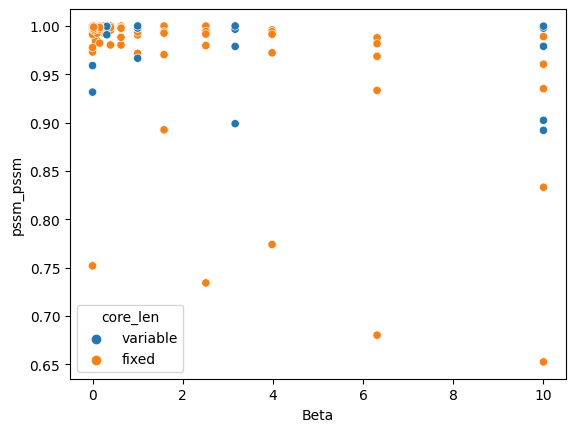

In [65]:
dat
config_dat
plot_dat = pd.merge(dat, config_dat.query("parameter == 'beta'"), left_on='algorithm', right_on='config_id')
plot_dat["value"] = plot_dat["value"].astype(float)
sns.scatterplot(data=plot_dat, x='value', y = "pssm_pssm", hue="core_len")
plt.xlabel('Beta')

imodulon      object
algorithm     object
pssm_pssm    float64
config_id     object
parameter     object
value         object
core_len      object
dtype: object